In [1]:
from datasets.transforms import GriddedRandomMask, RandomMask
from torchvision.transforms import ToPILImage
from IPython.display import display
import torch


In [2]:
grid_masking = GriddedRandomMask(mask_size=32, mask_ratio=0.7)
random_masking = RandomMask(mask_size=32, mask_ratio=0.7)

In [3]:
random_input = torch.randn(2, 3, 224, 224)

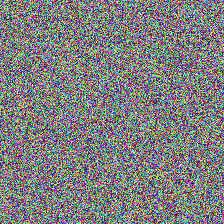

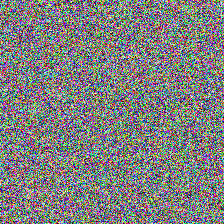

In [4]:
for i in range(2):
    display(ToPILImage()(random_input[i]))

In [5]:
imagewise_masked = grid_masking(random_input, batch_wise=False)
batchwise_masked = grid_masking(random_input, batch_wise=True)

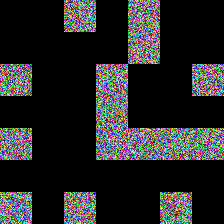

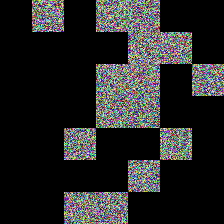

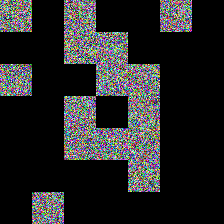

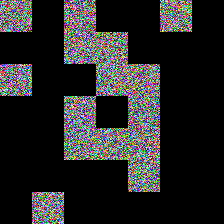

In [6]:
for i in range(2):
    display(ToPILImage()(imagewise_masked[i]))

for i in range(2):
    display(ToPILImage()(batchwise_masked[i]))

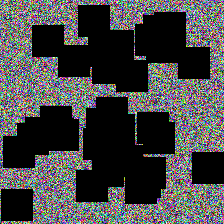

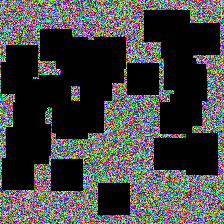

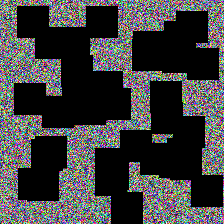

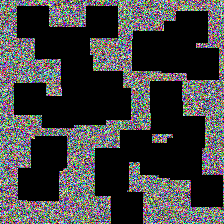

In [7]:
imagewise_masked = random_masking(random_input, batch_wise=False)
batchwise_masked = random_masking(random_input, batch_wise=True)
for i in range(2):
    display(ToPILImage()(imagewise_masked[i]))

for i in range(2):
    display(ToPILImage()(batchwise_masked[i]))

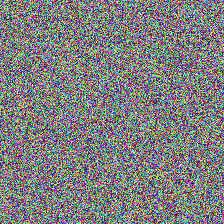

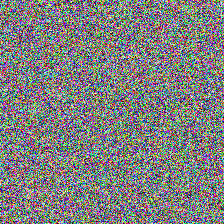

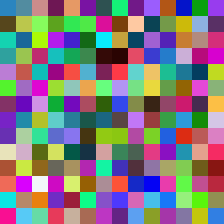

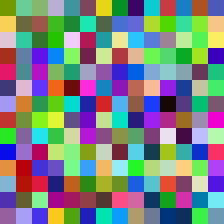

In [8]:
from datasets.transforms import SuperResolution
for i in range(2):
    display(ToPILImage()(random_input[i]))
    
sred = SuperResolution(16)(random_input)
for i in range(2):
    display(ToPILImage()(sred[i]))
    

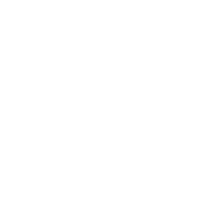

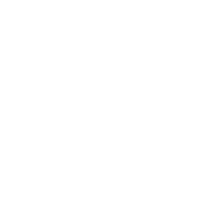

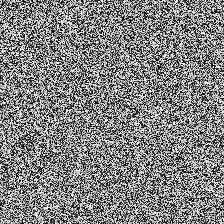

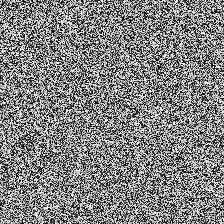

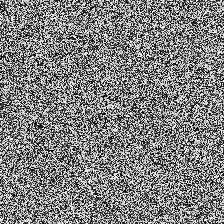

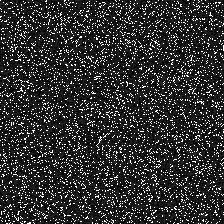

In [13]:
from datasets.transforms import Noise

ones = torch.ones(2, 3, 224, 224)

for i in range(2):
    display(ToPILImage()(ones[i]))
    
noised = Noise()(ones, batch_wise=True)
assert (noised[0] == noised[1]).all()

for i in range(2):
    display(ToPILImage()(noised[i]))

noised = Noise()(ones, batch_wise=False)
assert (noised[0] != noised[1]).all()

for i in range(2):
    display(ToPILImage()(noised[i]))


In [27]:
from torchvision.datasets import ImageNet

imagenet_train = ImageNet(root='/mnt/d/datasets/imagenet/val', split='val')

In [30]:
from torch.utils.data import random_split
import torch
a, b = random_split(imagenet_train, [5000, 45000], generator=torch.Generator().manual_seed(16))

In [31]:
c, d = random_split(imagenet_train, [5000, 45000], generator=torch.Generator().manual_seed(16))

In [38]:
c[1]

(<PIL.Image.Image image mode=RGB size=500x374>, 111)

In [39]:
a[1]

(<PIL.Image.Image image mode=RGB size=500x374>, 111)

In [28]:
len(imagenet_train)

50000

In [25]:
labels_idxs = {i: [] for i in range(1000)}
for idx, (_, label) in enumerate(imagenet_train):
    labels_idxs[label].append(idx)

KeyboardInterrupt: 

In [ ]:
labels_idxs

{}

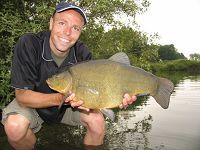

In [ ]:
display(imagenet_train[1][0])

In [14]:
imagenet_valid = ImageNet(root='/mnt/d/datasets/imagenet/val', split='val')

In [18]:
len(imagenet_valid.classes)

1000

In [2]:
from models import ModelWrapper
model = ModelWrapper('resnet18', pretrained=True, num_classes=10)

In [15]:
tuple(model.backbone.parameters())

(Parameter containing:
 tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
             1.7083e-02, -1.2694e-02],
           [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
            -1.2907e-01,  3.7424e-03],
           [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
             2.5632e-01,  6.3573e-02],
           ...,
           [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
            -4.2058e-01, -2.5781e-01],
           [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
             3.9359e-01,  1.6606e-01],
           [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
            -8.2230e-02, -5.7828e-03]],
 
          [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
             6.6221e-04, -2.5743e-02],
           [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
            -1.6051e-01, -1.2826e-03],
           [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
             3.6

In [14]:
dict(model.named_parameters())

{'alpha': Parameter containing:
 tensor(0.1000, requires_grad=True),
 'backbone.conv1.weight': Parameter containing:
 tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
             1.7083e-02, -1.2694e-02],
           [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
            -1.2907e-01,  3.7424e-03],
           [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
             2.5632e-01,  6.3573e-02],
           ...,
           [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
            -4.2058e-01, -2.5781e-01],
           [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
             3.9359e-01,  1.6606e-01],
           [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
            -8.2230e-02, -5.7828e-03]],
 
          [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
             6.6221e-04, -2.5743e-02],
           [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
            -1.6051e-01, -1.282

In [20]:
tuple(model.backbone.parameters()) + tuple(model.linear_head.parameters())

(Parameter containing:
 tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
             1.7083e-02, -1.2694e-02],
           [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
            -1.2907e-01,  3.7424e-03],
           [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
             2.5632e-01,  6.3573e-02],
           ...,
           [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
            -4.2058e-01, -2.5781e-01],
           [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
             3.9359e-01,  1.6606e-01],
           [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
            -8.2230e-02, -5.7828e-03]],
 
          [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
             6.6221e-04, -2.5743e-02],
           [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
            -1.6051e-01, -1.2826e-03],
           [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
             3.6

In [ ]:
datasets.CIFAR10